In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn joblib


In [2]:
import pandas as pd

# read the uploaded CSV file
df = pd.read_csv("/content/insurance.csv")

# show first few rows
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


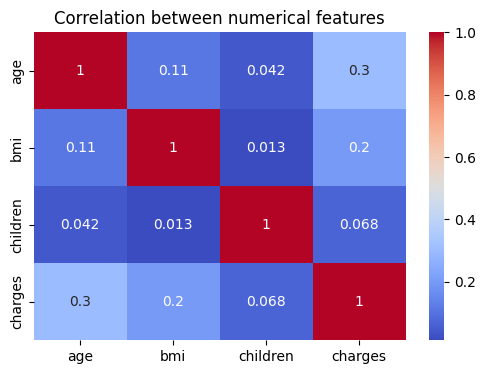

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between numerical features")
plt.show()



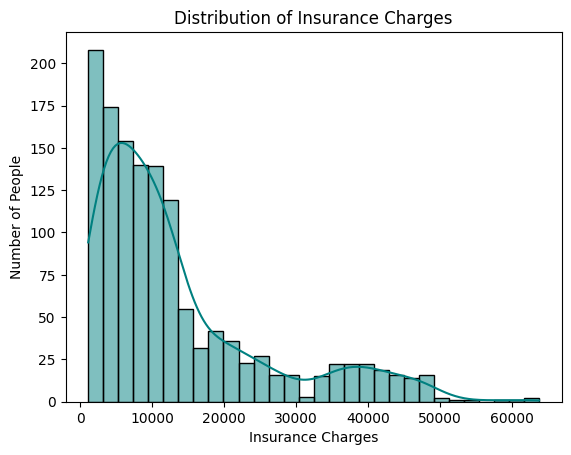

In [6]:
sns.histplot(df['charges'], kde=True, color='teal')
plt.title("Distribution of Insurance Charges")
plt.xlabel("Insurance Charges")
plt.ylabel("Number of People")
plt.show()


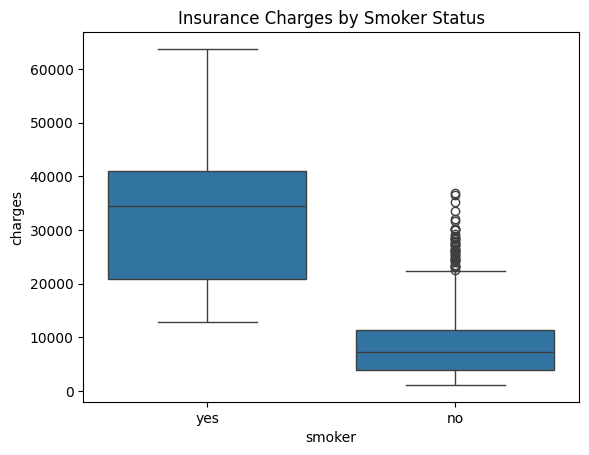

In [9]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Insurance Charges by Smoker Status")
plt.show()


/tmp/ipython-input-3907443490.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='smoker', y='charges', data=avg_charges, palette='pastel')


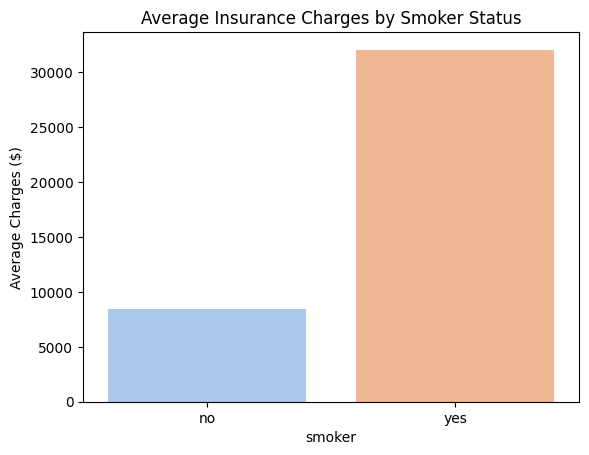

In [10]:
avg_charges = df.groupby('smoker')['charges'].mean().reset_index()

sns.barplot(x='smoker', y='charges', data=avg_charges, palette='pastel')
plt.title("Average Insurance Charges by Smoker Status")
plt.ylabel("Average Charges ($)")
plt.show()


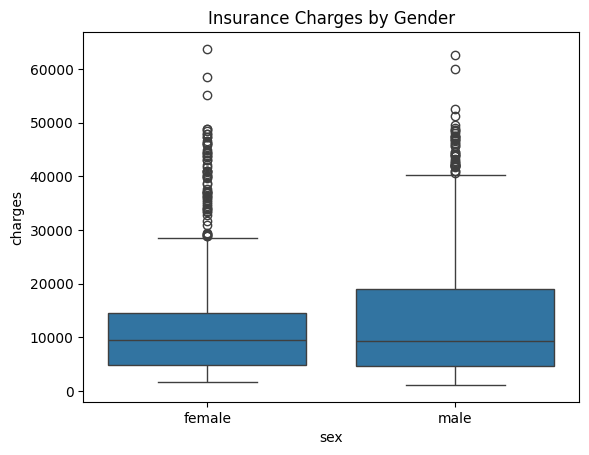

In [11]:
sns.boxplot(x='sex', y='charges', data=df)
plt.title("Insurance Charges by Gender")
plt.show()


/tmp/ipython-input-199141499.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='charges', data=avg_gender, palette='muted')


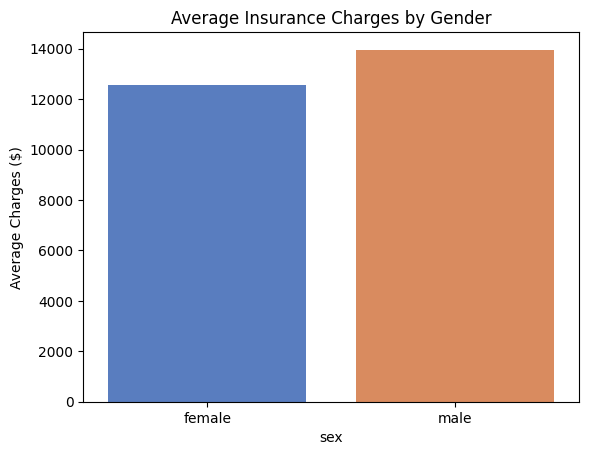

In [12]:
avg_gender = df.groupby('sex')['charges'].mean().reset_index()

sns.barplot(x='sex', y='charges', data=avg_gender, palette='muted')
plt.title("Average Insurance Charges by Gender")
plt.ylabel("Average Charges ($)")
plt.show()


/tmp/ipython-input-1064991377.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, palette='Set2')


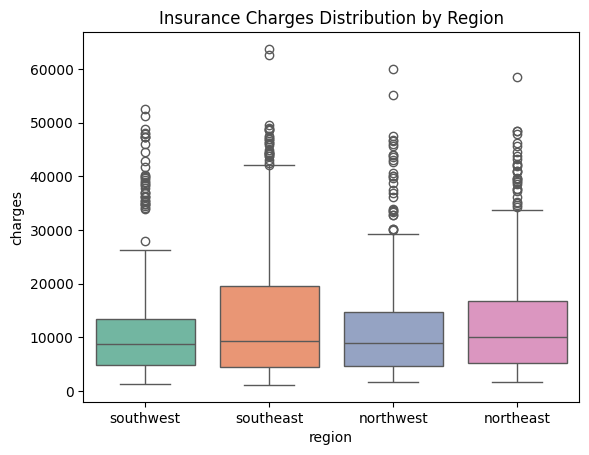

In [13]:
sns.boxplot(x='region', y='charges', data=df, palette='Set2')
plt.title("Insurance Charges Distribution by Region")
plt.show()


/tmp/ipython-input-4051077380.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=avg_region, palette='cool')


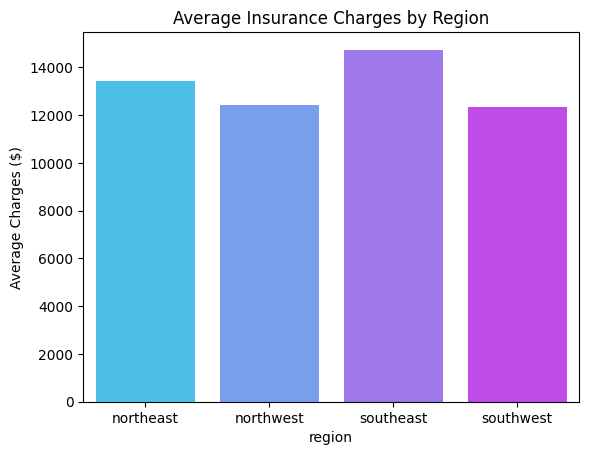

In [14]:
avg_region = df.groupby('region')['charges'].mean().reset_index()

sns.barplot(x='region', y='charges', data=avg_region, palette='cool')
plt.title("Average Insurance Charges by Region")
plt.ylabel("Average Charges ($)")
plt.show()


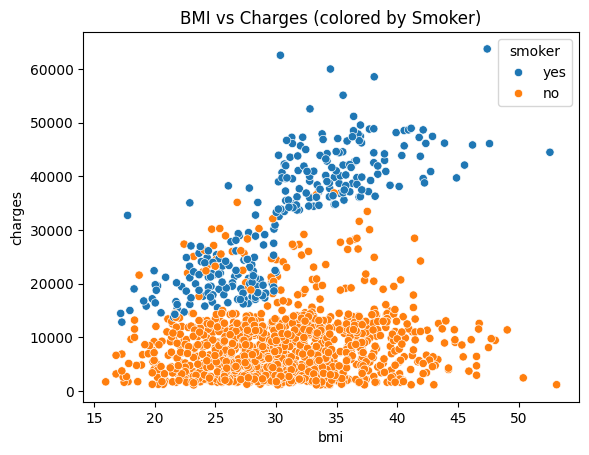

In [15]:
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("BMI vs Charges (colored by Smoker)")
plt.show()


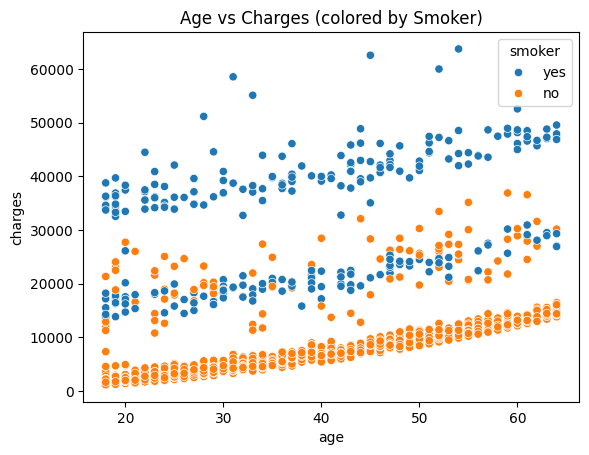

In [16]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Age vs Charges (colored by Smoker)")
plt.show()


In [17]:
#  Separate the input features (X) and the target/output (y)

# 'charges' is the column we want to predict (the insurance cost)
# So, we remove it from the main dataset to form X (input features)
X = df.drop('charges', axis=1)

# 'y' will contain only the 'charges' column — this is our target variable
y = df['charges']


print("Input features (X):")
print(X.head())
print("\nTarget column (y):")
print(y.head())

Input features (X):
   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest

Target column (y):
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [18]:
# Convert text (categorical) columns into numeric form using One-Hot Encoding


X = pd.get_dummies(X, drop_first=True)


print("After One-Hot Encoding:\n")
print(X.head())
print("\nColumn names after encoding:")
print(list(X.columns))


After One-Hot Encoding:

   age     bmi  children  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0     False        True             False   
1   18  33.770         1      True       False             False   
2   28  33.000         3      True       False             False   
3   33  22.705         0      True       False              True   
4   32  28.880         0      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  

Column names after encoding:
['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']


In [19]:
# Split the data into Training and Testing sets

#use train_test_split from sklearn to randomly divide our data.
from sklearn.model_selection import train_test_split

# test_size=0.2 → 20% of the data goes to testing
# random_state=42 → makes the split reproducible (so you get same result each time)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (1070, 8)
Testing set shape: (268, 8)


In [20]:
# Build and train the Linear Regression model

from sklearn.linear_model import LinearRegression

# Create an object (model) from LinearRegression class
model = LinearRegression()

# Train the model using the training data (X_train and y_train)
model.fit(X_train, y_train)

# Once trained, the model learns the relationship between features and charges
print("Model training complete!")


Model training complete!


In [21]:
# Test the model using the test data

# Make predictions on X_test
y_pred = model.predict(X_test)

# Show a few predictions
print("Predicted charges:", y_pred[:5])
print("Actual charges:", list(y_test[:5]))


Predicted charges: [ 8969.55027444  7068.74744287 36858.41091155  9454.67850053
 26973.17345656]
Actual charges: [9095.06825, 5272.1758, 29330.98315, 9301.89355, 33750.2918]


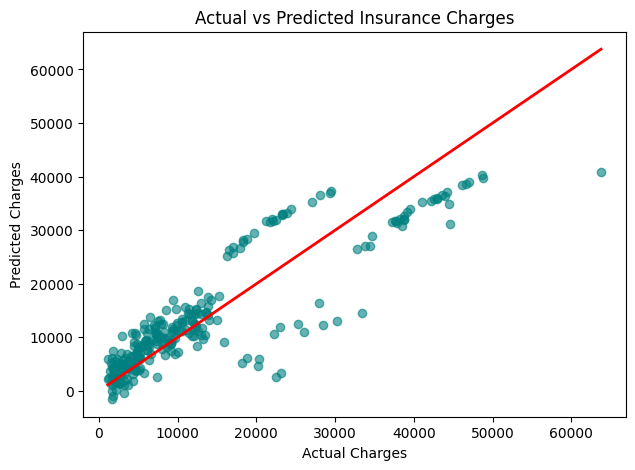

In [22]:
# Visualize Actual vs Predicted Charges

import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred, color='teal', alpha=0.6)  # actual vs predicted points
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Insurance Charges")

# Draw a perfect prediction line (y = x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)

plt.show()


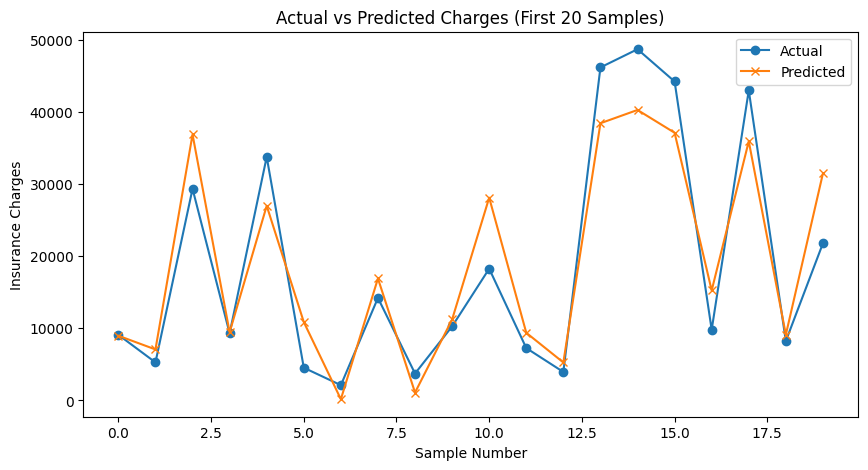

In [23]:
# Compare first 20 predictions visually
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:20], label="Actual", marker='o')
plt.plot(y_pred[:20], label="Predicted", marker='x')
plt.title("Actual vs Predicted Charges (First 20 Samples)")
plt.xlabel("Sample Number")
plt.ylabel("Insurance Charges")
plt.legend()
plt.show()


In [24]:
#Evaluate model performance

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# R2 Score (how well the model explains the variance in data)
r2 = r2_score(y_test, y_pred)

# Mean Absolute Error (average difference between predicted and actual values)
mae = mean_absolute_error(y_test, y_pred)

# Root Mean Squared Error (penalizes larger errors more)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Evaluation Metrics:")
print(f"R² Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Evaluation Metrics:
R² Score: 0.784
Mean Absolute Error (MAE): 4181.19
Root Mean Squared Error (RMSE): 5796.28


In [25]:
#Test model -own custom input data

import pandas as pd


custom_data = pd.DataFrame({
    'age': [35],
    'bmi': [28.5],
    'children': [2],
    'sex_male': [1],          # 1 for male, 0 for female
    'smoker_yes': [0],        # 1 for smoker, 0 for non-smoker
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0]
})


predicted_charge = model.predict(custom_data)

print(f"Predicted Insurance Charge: ${predicted_charge[0]:.2f}")


Predicted Insurance Charge: $6844.17


In [26]:
import pandas as pd


custom_data = pd.DataFrame({
    'age': [35],
    'bmi': [28.5],
    'children': [2],
    'sex_male': [1],          # 1 for male, 0 for female
    'smoker_yes': [1],        # 1 for smoker, 0 for non-smoker
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0]
})


predicted_charge = model.predict(custom_data)

print(f"Predicted Insurance Charge: ${predicted_charge[0]:.2f}")


Predicted Insurance Charge: $30495.30


In [27]:
# Feature Optimization — Create BMI Category and Age Group features

import pandas as pd

# Group BMI values into health-based ranges: underweight, normal, overweight, obese
df['bmi_category'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['underweight', 'normal', 'overweight', 'obese']
)

# Group ages into meaningful life stages: young, adult, middle-aged, senior
df['age_group'] = pd.cut(
    df['age'],
    bins=[17, 25, 40, 55, 65],
    labels=['young', 'adult', 'middle_aged', 'senior']
)


df[['age', 'bmi', 'bmi_category', 'age_group']].head(10)


,age,bmi,bmi_category,age_group
0,19,27.900,overweight,young
1,18,33.770,obese,young
2,28,33.000,obese,adult
3,33,22.705,normal,adult
4,32,28.880,overweight,adult
5,31,25.740,overweight,adult
6,46,33.440,obese,middle_aged
7,37,27.740,overweight,adult
8,37,29.830,overweight,adult
9,60,25.840,overweight,senior


In [28]:
# One-Hot Encode the new categorical features


df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region', 'bmi_category', 'age_group'], drop_first=True)


print("Columns after encoding:")
print(df_encoded.columns)


Columns after encoding:
Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest',
       'bmi_category_normal', 'bmi_category_overweight', 'bmi_category_obese',
       'age_group_adult', 'age_group_middle_aged', 'age_group_senior'],
      dtype='object')


In [29]:
# Separate features (X) and target (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Split into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("\nTesting set shape:", X_test.shape)



Training set shape: (1070, 14)

Testing set shape: (268, 14)


In [30]:
# Retrain the Linear Regression model with optimized features

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns


model_opt = LinearRegression()
model_opt.fit(X_train, y_train)


y_pred_opt = model_opt.predict(X_test)

print("Model retrained successfully with optimized features!")




Model retrained successfully with optimized features!


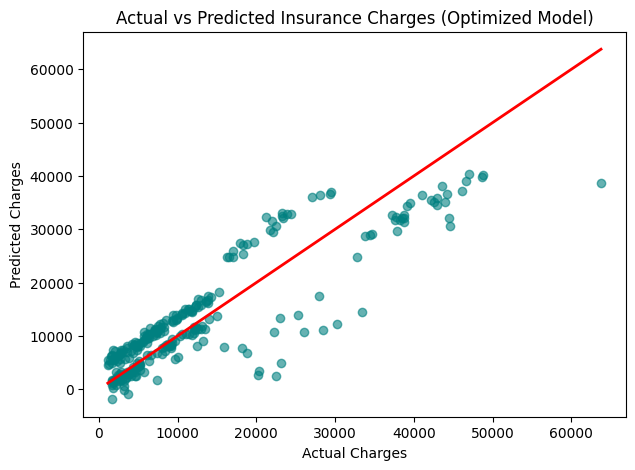

In [31]:
# Visualization: Actual vs Predicted Charges

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_opt, color='teal', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted Insurance Charges (Optimized Model)")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

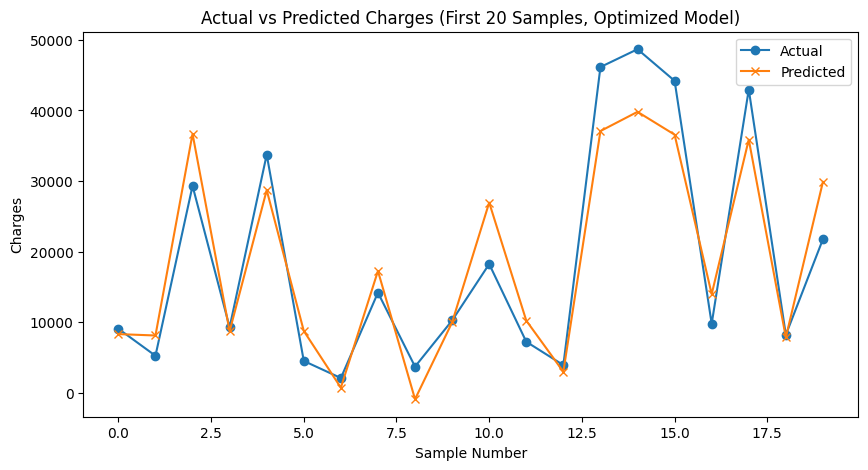

In [32]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:20], label="Actual", marker='o')
plt.plot(y_pred_opt[:20], label="Predicted", marker='x')
plt.title("Actual vs Predicted Charges (First 20 Samples, Optimized Model)")
plt.xlabel("Sample Number")
plt.ylabel("Charges")
plt.legend()
plt.show()

In [33]:
# Evaluate the Optimized Model Performance

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np


r2_opt = r2_score(y_test, y_pred_opt)
mae_opt = mean_absolute_error(y_test, y_pred_opt)
rmse_opt = np.sqrt(mean_squared_error(y_test, y_pred_opt))


print("Optimized Model Evaluation Metrics:")
print(f"R² Score: {r2_opt:.3f}")
print(f"Mean Absolute Error (MAE): {mae_opt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_opt:.2f}")



Optimized Model Evaluation Metrics:
R² Score: 0.784
Mean Absolute Error (MAE): 4284.64
Root Mean Squared Error (RMSE): 5796.26


In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_p, y_train_p)
y_pred_poly = model_poly.predict(X_test_p)

print("Polynomial Regression R²:", r2_score(y_test_p, y_pred_poly))


Polynomial Regression R²: 0.8654372301153682


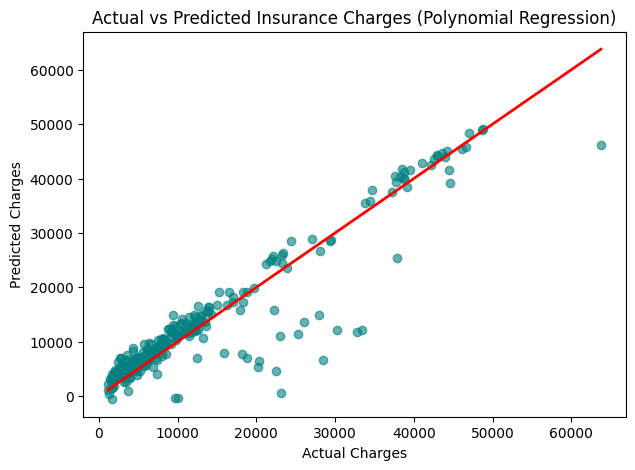

In [35]:
#Visualize Actual vs Predicted for Polynomial Regression
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_test_p, y_pred_poly, color='teal', alpha=0.6)
plt.plot([y_test_p.min(), y_test_p.max()], [y_test_p.min(), y_test_p.max()], color='red', linewidth=2)
plt.title("Actual vs Predicted Insurance Charges (Polynomial Regression)")
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

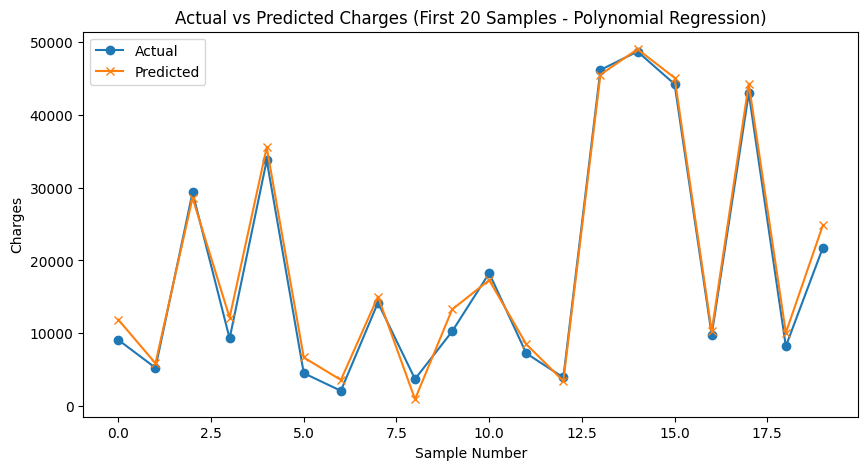

In [36]:
# Compare first 20 Actual vs Predicted values

plt.figure(figsize=(10,5))
plt.plot(y_test_p.values[:20], label="Actual", marker='o')
plt.plot(y_pred_poly[:20], label="Predicted", marker='x')
plt.title("Actual vs Predicted Charges (First 20 Samples - Polynomial Regression)")
plt.xlabel("Sample Number")
plt.ylabel("Charges")
plt.legend()
plt.show()


In [38]:
# Evaluate Polynomial Regression Model

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

r2_poly = r2_score(y_test_p, y_pred_poly)
mae_poly = mean_absolute_error(y_test_p, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test_p, y_pred_poly))

print(" Polynomial Regression Model Metrics:")
print(f"R² Score: {r2_poly:.3f}")
print(f"Mean Absolute Error (MAE): {mae_poly:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_poly:.2f}")


 Polynomial Regression Model Metrics:
R² Score: 0.865
Mean Absolute Error (MAE): 2599.16
Root Mean Squared Error (RMSE): 4570.63


In [41]:
# Predict Insurance Charges for Custom Input data

import pandas as pd


custom_input = pd.DataFrame({
    'age': [45],
    'bmi': [32.5],
    'children': [2],
    'sex_male': [1],            # 1 = male, 0 = female
    'smoker_yes': [1],          # 1 = smoker, 0 = non-smoker
    'region_northwest': [0],
    'region_southeast': [1],
    'region_southwest': [0],
    'bmi_category_normal': [0],
    'bmi_category_overweight': [0],
    'bmi_category_obese': [1],
    'age_group_adult': [0],
    'age_group_middle_aged': [1],
    'age_group_senior': [0]
})


custom_input_poly = poly.transform(custom_input)


predicted_charge = model_poly.predict(custom_input_poly)

print(f"Predicted Insurance Charge: ${predicted_charge[0]:.2f}")


Predicted Insurance Charge: $42367.16
